| Übungszettel 5 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 20.05.21 23.15 Uhr |
| Studierende | Daniel Schiller, Thomas Blankenburg, Dennis Jakob |


---

### Aufgabe 1: Runges Phänomen

Wir betrachten die Runge-Funktion 
$$ f(x) = \frac{1}{1+x^2}, \quad x \in [-5,5]. $$

1. Definieren Sie $f(x)$ als `runge_func(x)`.

1. Erstellen Sie äquidistante Stützstellen `xi`, d.h. $x_0,\ldots,x_n$ mit $n = 4$, für den Definitionsbereich $[-5,5]$.

1. Berechnen Sie die Auswertungen `fi`, d.h. $f(x_0),\ldots,f(x_n)$, und lösen Sie die Interpolationsaufgabe zu den äquidistanten Stützstellen `xi`: nutzen Sie entweder `pLagr(xi,fi,x)` oder `pNewt(xi,ai,x)` vom letzen Übungsblatt. Plotten Sie die Runge-Funktion und das Interpolationspolynom. Verbessert sich die Interpolationsgüte, wenn Sie die Anzahl äquidistanter Stützstellen $n$ erhöhen?

1. Aus der Vorlesung kennen Sie eine Formel zur Berechnung optimaler Stützstellen anhand der Tschebyscheff-Polynome: definieren Sie dazu die Funktion `make_cheb_xi(a,b,n)` und berechnen Sie für die Intervallgrenzen `a = -5.` und `b = 5.` diese Stützstellen $\hat{x}_0,\ldots,\hat{x}_n$.

1. Wiederholen Sie 3. mit optimalen Stützstellen $\hat{x}_0,\ldots,\hat{x}_n$. Beachten Sie, `fi` anzupassen, d.h. $f(\hat{x}_0),\ldots,f(\hat{x}_n)$ neu zu berechnen.

1. Vergleichen Sie das Verhalten beider Interpolationspolynome für $n$ steigend.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 4
a = -5.
b = 5.

---

In [2]:
def runge_func(x):
    return 1. / (1. + x**2)

def make_cheb_xi(a,b,n):
    xi = np.zeros(n + 1)
    for i in range(n + 1):
        xi[i] = (a + b) / 2. + ((b - a) / 2.) * np.cos((2. * float(i) + 1.) * np.pi / (2 * float(n) + 2.))
    return xi

In [3]:
def L(k,xi,x):
    res = 1.
    for i in range(xi.size):
        if i != k:
            res *= (x - xi[i]) / (xi[k] - xi[i])
    return res
    

def pLagr(xi,fi,x):
    res = 0.
    for i in range(xi.size):
        res += fi[i] * L(i, xi, x)
    return res

In [4]:
def xifi(n):
    xi = np.linspace(a, b, n + 1)
    return (xi, runge_func(xi))
def xifiT(n):
    xi = make_cheb_xi(a, b, n)
    return (xi, runge_func(xi))

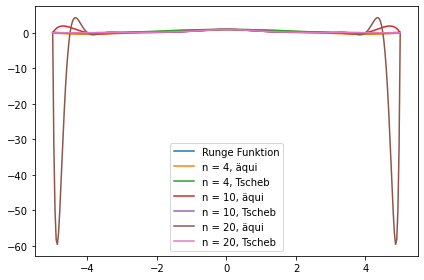

In [5]:
x_lin = np.linspace(a, b, 300)

plt.figure()

plt.plot(x_lin, runge_func(x_lin), label = "Runge Funktion")

n = 4
(x4, f4) = xifi(n)
plt.plot(x_lin, pLagr(x4, f4, x_lin), label = "n = 4, äqui")
(x4T, f4T) = xifiT(n)
plt.plot(x_lin, pLagr(x4T, f4T, x_lin), label = "n = 4, Tscheb")

n = 10
(x10, f10) = xifi(n)
plt.plot(x_lin, pLagr(x10, f10, x_lin), label = "n = 10, äqui")
(x10T, f10T) = xifiT(n)
plt.plot(x_lin, pLagr(x10T, f10T, x_lin), label = "n = 10, Tscheb")

n = 20
(x20, f20) = xifi(n)
plt.plot(x_lin, pLagr(x20, f20, x_lin), label = "n = 20, äqui")
(x20T, f20T) = xifiT(n)
plt.plot(x_lin, pLagr(x20T, f20T, x_lin), label = "n = 20, Tscheb")

plt.legend(loc = 'best')
plt.tight_layout()

Mit den äquidistnaten Stützstellen wird es nur schlechter mit größem n. Anders verhält es sich mit den Stützstellen aus den Tschebyshev-Polynomen. Dabei wird es nur besser (am besten kommentiert man plt.plot(..., n = 2, äqui) aus).